# Basic Clustering Algorithms

```
Author:
Zach Wolpe
zachcolinwolpe@gmail.com
www.zachwolpe.com
```

This notebook provides a basic skeleton of two entry level clustering algorithms: 

* K Means clustering
* Hierarchical clustering

These clustering algorithms find underlying groups (clusters) within a dataset.

# K Means
Basic template for K-means clustering.

## Algorithm
K Means works by:
    - choose K: number of clusters
    - selecting K points (centroids) at random on the plane 
    - assigning each datapoint to whichever one of the K centroids it is closest to (using Euclidean distances)
    - recalculate the center of each cluster & assign this location as the new cetroid 
    - reassign each datapoint to the new centroids
    - iterate until convergence is obtained
   
Note: convergence is reached when the centroids are no longer shifted.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

plt.style.use('seaborn-darkgrid')

In [2]:
# Importing the dataset - a data dataset is used
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


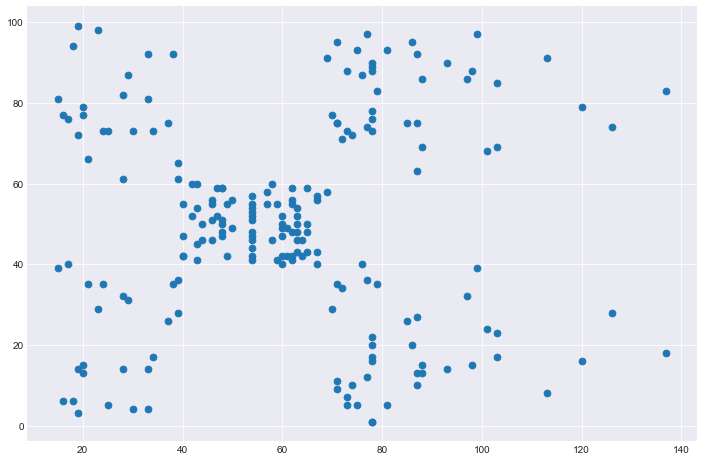

In [3]:
# visualize the unclustered data
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], s = 45, label = 'Data');

5 clusters intuitively jump out.

## Selecting the number of clusters

One drawback of K-means is the practitioner needs to specify the number of cluster. One solution is to rely on the heuristics in the _elbow_ method. The WCSS (Within Cluster Sum of Squares) is calucated by summing the square differences between inividual points and it's cluster centroid. By definition WCSS will continue to decrease until it == ZERO (where number of clusters = number of points). 

A good heuristic for _how many clusters_ to use is to select the number of clusters where WCSS decrease goes from a drastic drecrease to a moderate one (in our case: 5 clusters). This ensures the clusters fit the data well, but without fitting so well as to overfit.

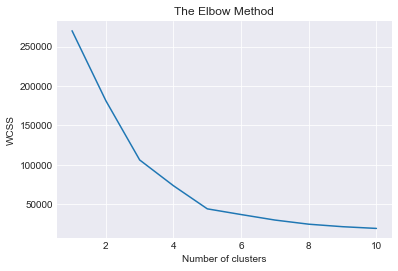

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia is another name for wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It is apparent that 5 clusters is optimal - according to WCSS.

### Fit the model
As such, we then fit a K-means with 5 clusters

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

### Visual the results

By plotting the data - categorized by colour determined by K-Means - it's clear the data has been separated into 5 distinct groups. Bare in mind, this toy data set has produced unrealistically perfect results.

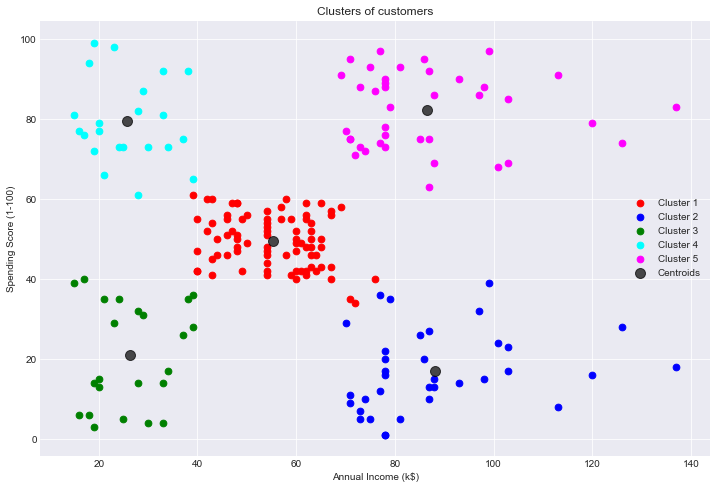

In [6]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 45, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 45, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 45, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 45, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 45, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', alpha = 0.7, label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K Means Conclusion
The data compares _*Spending Score*_ to _*Annual Income*_, we can imagine an multitude of reasons to cluster in such a fashion (for example, focus on what High Income + High Spend customers to maximize revenue).


# Hierarchical Clustering

A basic Hierarchical Clustering skeleton. Hierarchical clustering can be a powerful (but expensive) approach.

Hierarchical clustering is further segregated into two type:
* Agglomerative (bottom up)
* Divisive (top down)

This notebook covers Agglomerative hierarchical clustering.

## Algorithm
#### Step 1: compute all possible clusters
    - make each datapoint an individual cluster (k = n)
    - combine the two closest datapoints to make them 1 cluster (k = n-1)
    - combine the two closest clusters to make them  1 cluster (k = n-2)
    - continue until k=1
    
Note: the distance between clusters may be determined in a multitude of ways, here midpoint of each cluster is used. 

#### Step 2: use Dendrogram to determine to optimal number of clusters
The dentrogram captures the above process to infer the optimal number of clusters, producing a tree diagram that represents the sequence in which clusters are formed. The vertical axis captures the distance between clusters being grouped whilst the horizontal axis represents all datapoints. 

Since the vertical axis ultimately informs us of 'dissimilarity' (how dissimilar two groups are) setting a threshold height we prevent any clusters being formed above the threshold.

A good heuristic is to simply find the longest vertical line that doesn't cross any extended vertical lines & set the number of clusters accordingly.

## Implementation

In [7]:
# Hierarchical Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [8]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Dendrogram
Graph the dendrogram to find the optimal number of clusters.

Locating the longest vertical line (given extended horizontal lines) suggests $K=5$ clusters.

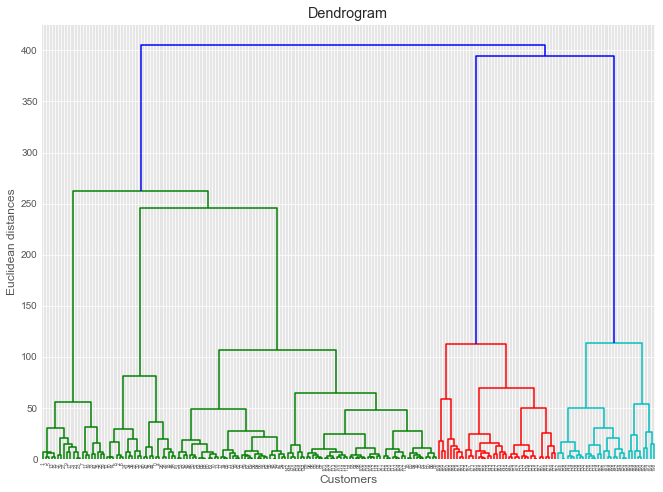

In [9]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(11,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Fit the Hierarchical Clustering Algorithm
Fit the model with the predetermined $K=5$ clusters.

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualise the Results
Peruse the results by plotting the discovered clusters per colour. It is apparent the algorithm found meaningful clusters.

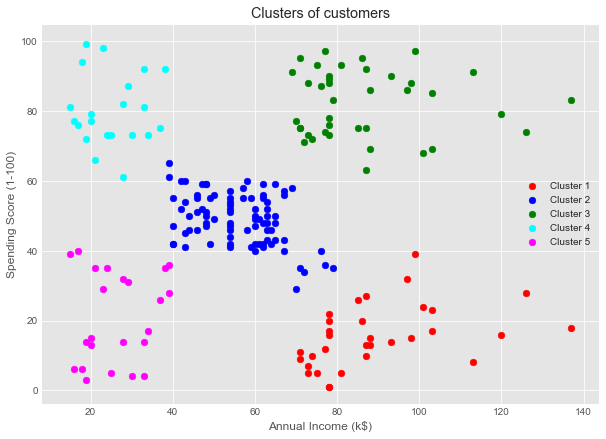

In [11]:
# Visualising the clusters
plt.figure(figsize=(10,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 45, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 45, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 45, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 45, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 45, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()